In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# True function
def f(x):
    # Weird hacks since manim gives inputs of 0 to 4, but we want 0 to 1 for formula
    return 0.011269 * x ** 3 - 0.282857 * x ** 2 + 2.0953 * x - 0.8238 + 1

np.array([7.61716764, 0.90172024, 3.71814466, 4.36750913, 2.98950450, 2.91913018, 8.52233653, 10.58801888, 5.93848068, 9.53650860, 0.53061528, 1.78722222, 5.80115584, 1.49293031, 6.40259288, 11.52405740, 11.65613147, 0.53286417, 8.96019852, 1.08977267, 2.25072521, 10.28839050, 7.63533649, 10.26963105, 0.38019063, 0.13413832, 10.07453377, 7.76473214, 9.77870046, 11.75253838])
np.array([5.09991515, 1.82960202, 4.58422264, 5.03405898, 4.02343428, 4.05124931, 4.88800256, 4.37779295, 4.05462105, 4.60134096, 1.27004521, 2.92274264, 5.24636069, 3.10546383, 4.45337894, 3.58438238, 3.53523741, 1.16452046, 5.21224425, 2.27115462, 3.87225526, 3.54579937, 4.73474202, 3.90169973, 0.37742214, 0.62676250, 4.52996489, 4.93463259, 4.72196134, 3.78750196])


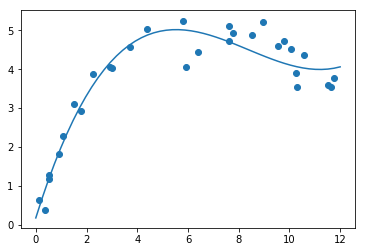

In [3]:
seed = 100012
N = 30
np.random.seed(seed)
XS = np.random.uniform(0, 12, (N,))
YS = f(XS) + np.random.normal(0, 0.4, (N,))

print("np.array([" + ", ".join(map(lambda x: "%.8f" % x, XS)) + "])")
print("np.array([" + ", ".join(map(lambda x: "%.8f" % x, YS)) + "])")

plt.scatter(XS, YS)
truex = np.linspace(0, 12, 50)
plt.plot(truex, f(truex))

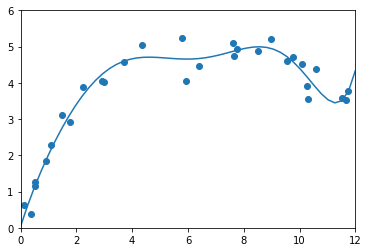

In [23]:
dim = 7

def h(x, deg):
    pows = np.zeros(deg+1)
    for i in range(deg+1):
        pows[i] = pow(x, i)
    return pows


def H(Xtrain, deg):
    N = Xtrain.shape[0]
    X = np.empty((N, deg+1))
    for i in range(N):
        X[i] = h(Xtrain[i], deg)
    return X


def beta(HX, Y):
    assert Y.shape[1] == 1
    return np.matmul(np.linalg.inv(np.matmul(HX.T, HX)), np.matmul(HX.T, Y))


def fhat(x, Xtrain, Ytrain, deg):
    xhat = h(x, deg)
    b = beta(H(Xtrain, deg), Ytrain)
    return np.matmul(xhat, b)[0]  # the matmul returns a 1x1 array

xs = np.linspace(0, 12)
ys = np.zeros(xs.shape[0])
for i, x in enumerate(xs):
    ys[i] = fhat(x, XS, YS[np.newaxis].T, dim)

plt.xlim(0, 12)
plt.ylim(0, 6)
plt.scatter(XS, YS)
plt.plot(xs, ys)

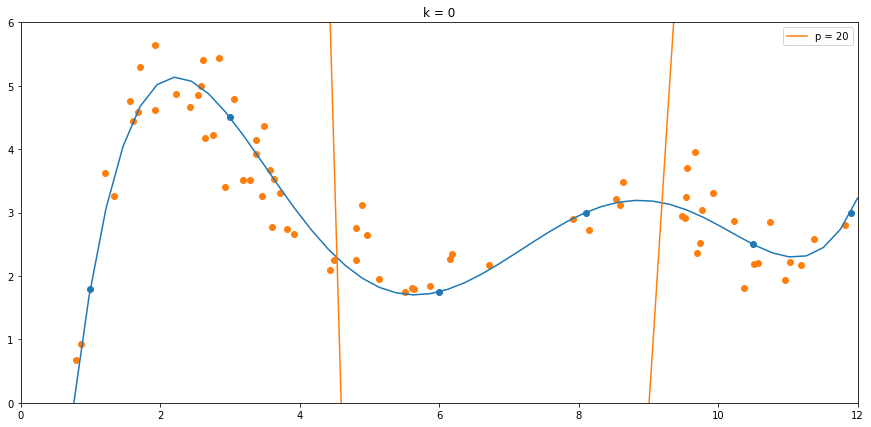

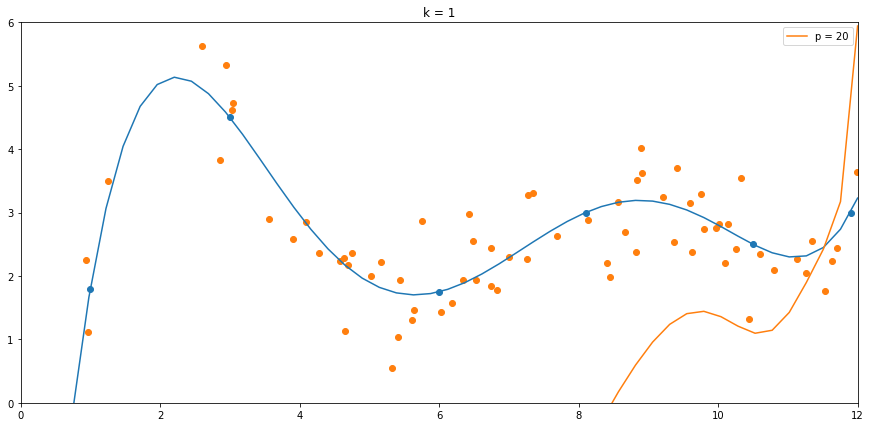

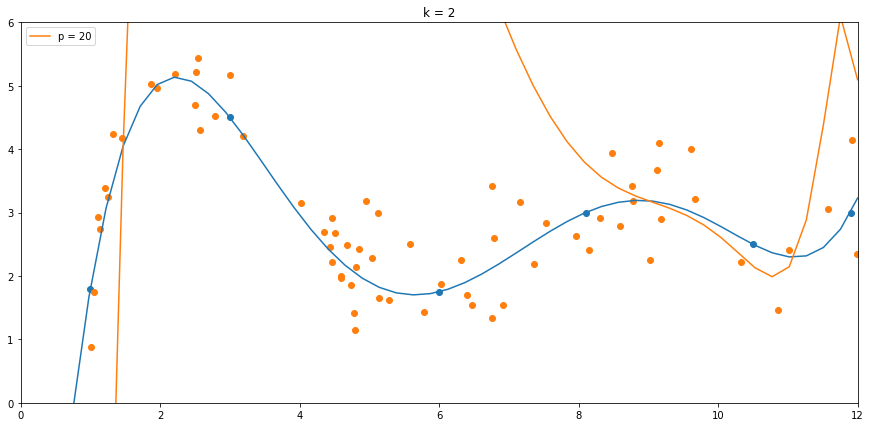

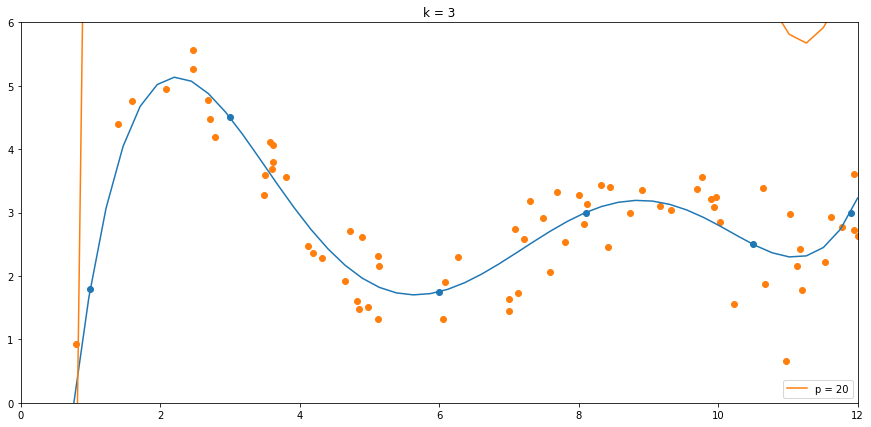

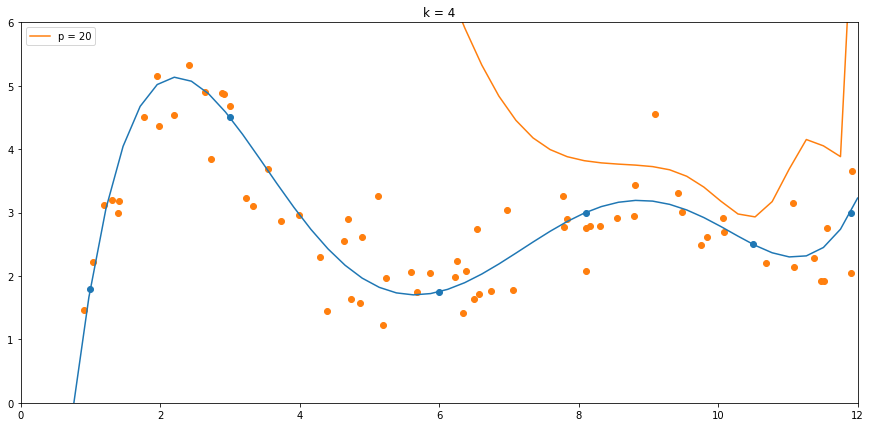

In [247]:
# GENERATE NEW 5deg function

dim = 5

def RSS(y, beta, x):
    return np.linalg.norm(y - np.matmul(fhat(x, beta)))


for k in range(0, 5):
    plt.figure(figsize=(15, 7))
    X_MIN, X_MAX = 0, 12
    Y_MIN, Y_MAX = 0, 6

    XTRUE = np.array([1., 3.0, 6.0, 8.1, 10.5, 11.9])
    YTRUE = np.array([1.8, 4.5, 1.75, 3.0, 2.5, 3.0])

    plt.scatter(XTRUE, YTRUE)

    xlin = np.linspace(X_MIN, X_MAX)
    ys = np.zeros(xlin.shape[0])
    for i, x in enumerate(xlin):
        ys[i] = fhat(x, XTRUE, YTRUE[np.newaxis].T, dim)

    plt.xlim(X_MIN, X_MAX)
    plt.ylim(Y_MIN, Y_MAX)
    plt.plot(xlin, ys)

    seed = 100034 + k
    N = 75
    np.random.seed(seed)
    xs = np.random.uniform(X_MIN, X_MAX, N)
    ys = np.zeros(N)
    for i, x in enumerate(xs):
        ys[i] = fhat(x, XTRUE, YTRUE[np.newaxis].T, dim) + np.random.normal(0, .5)
    plt.scatter(xs, ys)

    for j in range(20, 21):
        xhat = np.linspace(0, 12)
        yhat = np.zeros(xhat.shape[0])
        for i, x in enumerate(xhat):
            yhat[i] = fhat(x, xs, ys[np.newaxis].T, j)

        plt.plot(xhat, yhat, label="p = %d" % j)

    plt.legend()
    plt.title("k = %d, RSS %f" % (k, RSS()))